In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [ ]:
with open('/content/ehealthforumQAs.json') as d:
  data = json.load(d)
data

[{'answer': 'stopping smoking is about will power and being steadfast. you can stop safely by having bupropion or nicotine patch cover initially in consult with a doctor. contact an addiction clinic near you. wishing you best of health thanks',
  'question': 'how do i stop smoking now',
  'url': 'http://ehealthforum.com/health/stop-smoking-question-t462882.html',
  'tags': ['addiction', 'stop smoking']},
 {'answer': 'hello this sounds quite unfamiliar that due to no reason at this age you have no cycle for last three months. pregnancy is surely a remote possibility as there was a tubal ligation. the endometriosis is also unlikely could cause stoppage of cycle. you definitely need some hormonal tests like thyroid or prolactin to know the balance inside as well as an withdrawal bleeding. meet your doctor for an evaluation.',
  'question': 'i had a tubaligation 4 years ago and also have a minor case of endometriosis i am only 27 and my period stopped completely 3 months ago no more spotti

In [ ]:
question=[]
answer=[]
for d in data:
  question.append(d['question'])
  answer.append(d['answer'])

In [ ]:
question

['how do i stop smoking now',
 'i had a tubaligation 4 years ago and also have a minor case of endometriosis i am only 27 and my period stopped completely 3 months ago no more spotting in between nothing i am not stressed no change in daily habits diet weight nothing all urine pregnancy tests have been negative what could be wrong with me?',
 'could extra caffeine consumption be a cause of mild unilateral breast tenderness?',
 'hello- i am a 24 year old female 5"4 & 115 lb & was diagnosed with pcos at 19. i\'ve always been active & extremely healthy. spironolactone & an iud helped with acne & pain but in 2013 i had an ovarian torsion requiring surgery & they saved my right ovary. i began having hair loss from telogen effogen & reoccurant yeast infections- i was diagnosed as pre-diabetic & cut sugar our from my already low sugar diet. fast forward to january of this year i went to the er due to pain from another torsion on the right side & again the ovary was saved. i was put on ortho t

In [ ]:
len(question),len(answer)

(171, 171)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def data_preprocess(data_list):
  lemmatizer = WordNetLemmatizer()
# Lemmatization
  for i in range(len(data_list)):
      words = nltk.word_tokenize(data_list[i])
      words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
      data_list[i] = ' '.join(words)
  return data_list

In [ ]:
x="hello word"
nltk.word_tokenize(x)

['hello', 'word']

In [ ]:
x=["i don't eat seafood. should i be taking omega 3 supplements/vitamins or should i get it from another source such as walnuts?"]
d = data_preprocess(x)
d

["n't eat seafood . taking omega 3 supplements/vitamins get another source walnut ?"]

In [ ]:
question_1 =data_preprocess(question)
answer_1 = data_preprocess(answer)
len(question_1),len(answer_1)

(171, 171)

In [ ]:
def preprocess_target_data(sentences):
  target = map(lambda s:(' ').join(['<s>',s,'</s>']) ,sentences)
  return list(target)

In [ ]:
answer_2 =preprocess_target_data(answer_1)
answer_2

['<s> stopping smoking power steadfast . stop safely bupropion nicotine patch cover initially consult doctor . contact addiction clinic near . wishing best health thanks </s>',
 '<s> hello sound quite unfamiliar due reason age cycle last three month . pregnancy surely remote possibility tubal ligation . endometriosis also unlikely could cause stoppage cycle . definitely need hormonal test like thyroid prolactin know balance inside well withdrawal bleeding . meet doctor evaluation . </s>',
 '<s> extra caffeine cause gastric discomfort pain felt one side breast mostly left side right also possible time whole chest . get evaluated local pathology like mastitis . hope help . stay touch healthcare provider guidance answer education counselling purpose alternative actual visit doctor . take care khan </s>',
 '<s> hello thanks submitting question . per description undergone repeated surgery ovarian torsion ovary preserved . sound bit different torsion dictum remove whole ovary . recurrent pai

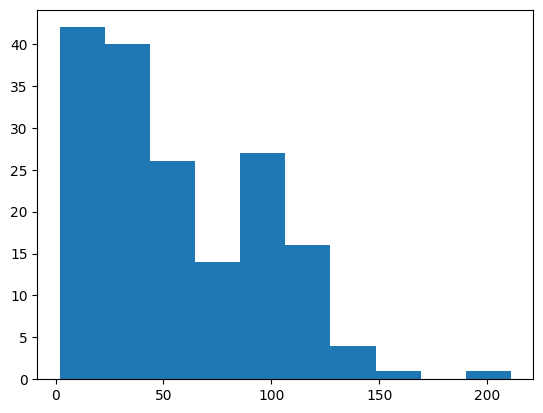

120.5

In [ ]:
calc_len_quest = [len(txt.split()) for txt in question_1]
plt.hist(calc_len_quest)
plt.show()
percent_max_question = np.percentile(calc_len_quest,95)
percent_max_question

In [ ]:
tokenizer_question = Tokenizer(oov_token='<OOV>',filters='"#$%$()*+-/:;=@[\\]^_`{|}~\t\n')
tokenizer_question.fit_on_texts(question_1)
question_words = tokenizer_question.word_index

question_sequence = tokenizer_question.texts_to_sequences(question_1)
question_padded = pad_sequences(question_sequence,maxlen=100,padding='post',truncating='post')

In [ ]:
num_question_words= len(question_words)

In [ ]:
def generate_decoder_input_target(sentences,tokenizer):
  sequences = tokenizer.texts_to_sequences(sentences)
  decoder_inputs = [s[:-1] for s in sequences]
  decoder_targets = [s[1:] for s in sequences]
  return decoder_inputs,decoder_targets


In [ ]:
#Decoder tokenizer
tokenizer_ans = Tokenizer(oov_token='<OOV>',filters='"#$%$()*+-/:;=@[\\]^_`{|}~\t\n')
tokenizer_ans.fit_on_texts(answer_2)
answer_words = tokenizer_ans.word_index

In [ ]:
num_answer_words=len(answer_words)

In [ ]:
decoder_input,decoder_target = generate_decoder_input_target(answer_2,tokenizer_ans)

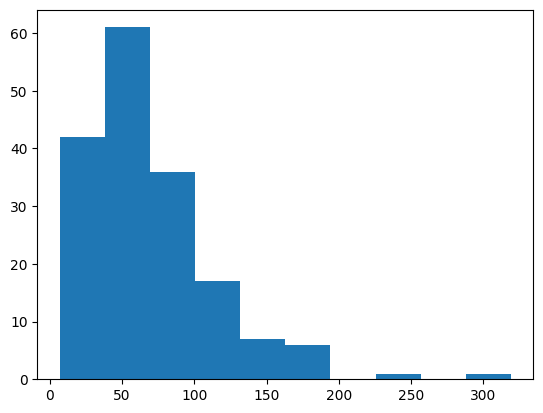

156.5

In [ ]:
calc_len_ans = [len(txt.split()) for txt in answer_2]
plt.hist(calc_len_ans)
plt.show()
percent_max_answer = np.percentile(calc_len_ans,95)
percent_max_answer

In [ ]:
input_decoder_padded = pad_sequences(decoder_input,maxlen=100,padding='post',truncating='post')
target_decoder_padded = pad_sequences(decoder_target,maxlen=100,padding='post',truncating='post')

In [ ]:
#embedding layer for encoder
embedding_encoder = tf.keras.layers.Embedding(num_question_words,256,name='encoder_embedding_layer')
embedding_decoder =tf.keras.layers.Embedding(num_answer_words,256,name='decoder_embedding_layer')

In [ ]:
encoder_input = tf.keras.layers.Input(shape=[None],name='encoder_input')
encoder_embedding = embedding_encoder(encoder_input)
encoder_out= tf.keras.layers.LSTM(512,name='LSTM',return_sequences=True)(encoder_embedding)
encoder_out,h_out,c_out = tf.keras.layers.LSTM(512,return_state=True,name='state_LSTM')(encoder_out)
encoder_state = (h_out,c_out)

In [ ]:
decoder_input = tf.keras.layers.Input(shape=[None],name='Decoder_input')
embedding_decode = embedding_decoder(decoder_input)
decoder_outputs, _, _ = tf.keras.layers.LSTM(512,return_sequences=True,return_state=True,name='Lstm_decod')(embedding_decode,initial_state=encoder_state)
decoder_outputs, _, _ = tf.keras.layers.LSTM(512,return_sequences=True,return_state=True,name='decoder_Lstm')(decoder_outputs)
decoder_dense = tf.keras.layers.Dense(num_answer_words, activation='softmax', name='decoder_dense')
y_proba = decoder_dense(decoder_outputs)

In [ ]:
model_0 = tf.keras.Model([encoder_input,decoder_input],y_proba,name='Q_A')
model_0.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

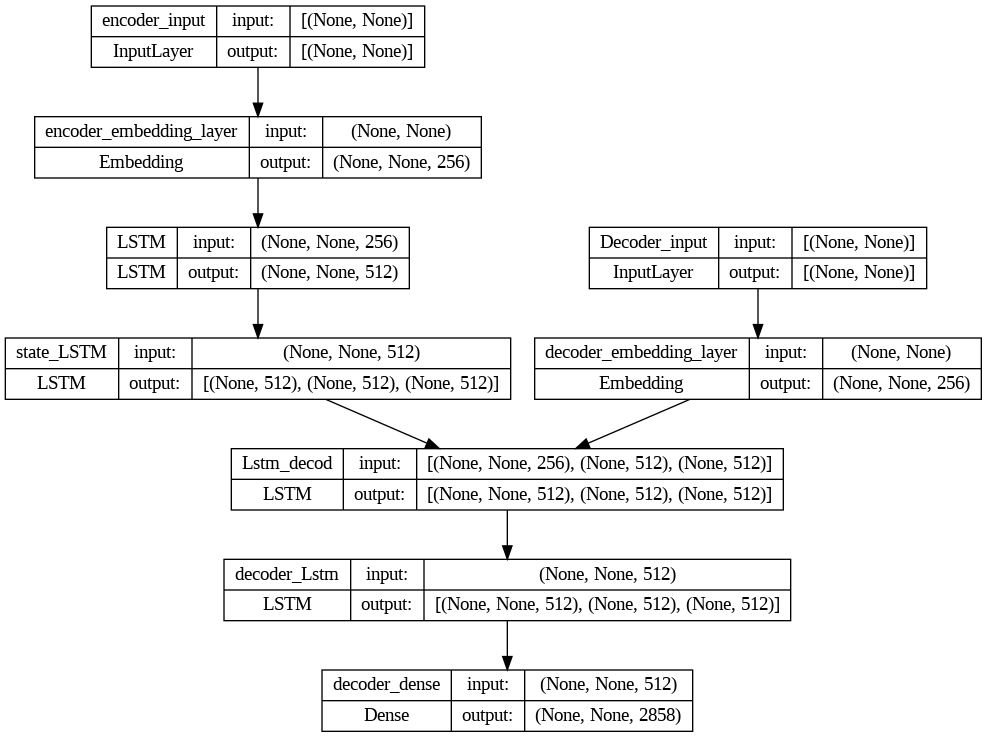

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_0, to_file='Q_A.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model_0.fit([question_padded, input_decoder_padded], target_decoder_padded,epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 179ms/step - loss: nan - accuracy: 0.3899
Epoch 2/50
6/6 [==============================] - 1s 130ms/step - loss: nan - accuracy: 0.3899
Epoch 3/50
6/6 [==============================] - 1s 130ms/step - loss: nan - accuracy: 0.3899
Epoch 4/50
6/6 [==============================] - 1s 105ms/step - loss: nan - accuracy: 0.3899
Epoch 5/50
6/6 [==============================] - 1s 138ms/step - loss: nan - accuracy: 0.3899
Epoch 6/50
6/6 [==============================] - 1s 115ms/step - loss: nan - accuracy: 0.3899
Epoch 7/50
2/6 [=========>....................] - ETA: 0s - loss: nan - accuracy: 0.4075

KeyboardInterrupt: 

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self,vocab_size,embedding_dim,hidden_dim):
    super(Encoder,self).__init__()

    self.embedding = tf.keras.layers.Embedding(vocab_size,
                                               embedding_dim,
                                               name='encoder_embedding_layer')
    self.lstm = tf.keras.layers.LSTM(hidden_dim,
                                     return_sequences=True,
                                     return_state=True,
                                     name='encoder_lstm')
  def call(self,input):
    embeddings = self.embedding(input)
    output_seq,state_h,state_c = self.lstm(embeddings)
    return output_seq,state_h,state_c

In [ ]:
embedding_dim=128
hidden_dim=256

In [ ]:
test_encoder = Encoder(num_answer_words+1, embedding_dim, hidden_dim)

In [ ]:
class LuongAttention(tf.keras.Model):
  def __init__(self,hidden_dim):
    super(LuongAttention,self).__init__()

    self.w = tf.keras.layers.Dense(hidden_dim,name='decoder_output_dense')
  def call(self,inputs):
    encoder_outputs_seq,decoder_output = inputs
    z=self.w(encoder_outputs_seq)
    attention_scores = tf.matmul(decoder_output,z,transpose_b=True)
    attention_weights = tf.keras.activations.softmax(attention_scores,axis=-1)
    context = tf.matmul(attention_weights,encoder_outputs_seq)
    return attention_weights, context

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, hidden_dim):
    super(Decoder, self).__init__()

    self.embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            name='decoder_embedding_layer')

    self.lstm = tf.keras.layers.LSTM(hidden_dim,
                            return_sequences=True,
                            return_state=True,
                            name='decoder_lstm')

    self.attention = LuongAttention(hidden_dim)

    self.w = tf.keras.layers.Dense(hidden_dim, activation='tanh', name='attended_outputs_dense')

    self.dense = tf.keras.layers.Dense(vocab_size, name='decoder_dense')


  def call(self, inputs):
    decoder_input, encoder_output_seq, lstm_state = inputs
    embeddings = self.embedding_layer(decoder_input)

    decoder_output, state_h, state_c = self.lstm(embeddings, initial_state=lstm_state)

    weights, context = self.attention([encoder_output_seq, decoder_output])

    decoder_output_with_attention = self.w(tf.concat(
        [tf.squeeze(context, 1), tf.squeeze(decoder_output, 1)], -1))

    logits = self.dense(decoder_output_with_attention)

    return logits, state_h, state_c, weights

In [ ]:
def loss_func(targets, logits):
  ce_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  mask = tf.cast(tf.math.not_equal(targets, 0), tf.float32)

  return ce_loss(targets, logits, sample_weight=mask)

In [ ]:
class TranslatorTrainer(tf.keras.Model):
  def __init__(self, encoder, decoder):
    super(TranslatorTrainer, self).__init__()

    self.encoder = encoder
    self.decoder = decoder

  # This method will be called by model.fit for each batch.
  @tf.function
  def train_step(self, inputs):
      loss = 0.
      acc= 0.
      encoder_input_seq, decoder_input_seq, decoder_target_seq = inputs

      with tf.GradientTape() as tape:
          encoder_output_seq, state_h, state_c = self.encoder(encoder_input_seq)

          # We need to create a loop to iterate through the target sequences
          for i in range(decoder_target_seq.shape[1]):

              # Input to the decoder must have shape of (batch_size, length)
              # so we need to expand one dimension (just like in the previous example).
              next_decoder_input = tf.expand_dims(decoder_input_seq[:, i], 1)
              logits, state_h, state_c, _ = self.decoder(
                  [next_decoder_input, encoder_output_seq, (state_h, state_c)])

              # The loss is now accumulated through the whole batch
              loss += self.loss(decoder_target_seq[:, i], logits)

      # Update the parameters and the optimizer
      variables = self.encoder.trainable_variables + self.decoder.trainable_variables
      gradients = tape.gradient(loss, variables)
      self.optimizer.apply_gradients(zip(gradients, variables))

      return {'loss': loss / decoder_target_seq.shape[1]}

In [ ]:
encoder = Encoder(num_question_words, embedding_dim, hidden_dim)
decoder = Decoder(num_answer_words, embedding_dim, hidden_dim)
optimizer = tf.keras.optimizers.Adam()

translator_trainer = TranslatorTrainer(encoder, decoder)
translator_trainer.compile(optimizer=optimizer, loss=loss_func,metrics=['accuracy'])

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((question_padded,
                                              input_decoder_padded,
                                              target_decoder_padded)).batch(32, drop_remainder=True)
d = dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
epochs = 50
hist=translator_trainer.fit(d, epochs=epochs)

Epoch 1/50
5/5 [==============================] - 1s 269ms/step - loss: 3.9177
Epoch 2/50
5/5 [==============================] - 1s 159ms/step - loss: 3.9083
Epoch 3/50
5/5 [==============================] - 1s 213ms/step - loss: 3.8995
Epoch 4/50
5/5 [==============================] - 1s 221ms/step - loss: 3.9030
Epoch 5/50
5/5 [==============================] - 1s 161ms/step - loss: 3.9088
Epoch 6/50
5/5 [==============================] - 1s 171ms/step - loss: 3.8959
Epoch 7/50
5/5 [==============================] - 1s 161ms/step - loss: 3.8652
Epoch 8/50
5/5 [==============================] - 1s 160ms/step - loss: 3.8558
Epoch 9/50
5/5 [==============================] - 1s 158ms/step - loss: 3.8467
Epoch 10/50
5/5 [==============================] - 1s 161ms/step - loss: 3.8351
Epoch 11/50
5/5 [==============================] - 1s 159ms/step - loss: 3.8258
Epoch 12/50
5/5 [==============================] - 1s 161ms/step - loss: 3.8169
Epoch 13/50
5/5 [==============================] 

In [ ]:
def translate_with_attention(sentence: str,
                             source_tokenizer, encoder,
                             target_tokenizer, decoder,
                             max_translated_len = 50):
    input_seq = source_tokenizer.texts_to_sequences([sentence])
    tokenized = source_tokenizer.sequences_to_texts(input_seq)

    input_seq = pad_sequences(input_seq, maxlen=50, padding='post')
    encoder_output, state_h, state_c  = encoder.predict(input_seq)

    current_word = '<s>'
    decoded_sentence = []


    while len(decoded_sentence) < max_translated_len:
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = target_tokenizer.word_index[current_word]

        logits, state_h, state_c, _ = decoder.predict([target_seq, encoder_output, (state_h, state_c)])
        current_token_index = np.argmax(logits[0])

        current_word = target_tokenizer.index_word[current_token_index]

        if (current_word == '</s>'):
          break

        decoded_sentence.append(current_word)

    return tokenized[0], ' '.join(decoded_sentence)

In [ ]:
l=[]

z=translate_with_attention(question_1[0],tokenizer_question,encoder,tokenizer_ans,decoder)
l.append(z)


1/1 [==============================] - 0s 19ms/step


In [ ]:
l

[('stop smoking',
  'hello . using forum . take . take s> month . however month . hope . hope . stay touch healthcare provider guidance . < s> doctor . < s> medical information care . < s> medical information care . < s> medical information care . < s> medical information')]

In [ ]:
import zipfile
# importing the required modules.
import random
import json
import pickle
import numpy as np
import nltk

from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

In [ ]:
data =zipfile.ZipFile('/content/chatbotkbmedical.zip')
data.extractall()
data.close()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# importing the required modules.
import random
import json
import pickle
import numpy as np
import nltk

from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD


lemmatizer = WordNetLemmatizer()

# reading the json.intense file
intents = json.loads(open("/content/intents.json").read())

# creating empty lists to store data
words = []
classes = []
documents = []
ignore_letters = ["?", "!", ".", ","]
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # separating words from patterns
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)  # and adding them to words list

        # associating patterns with respective tags
        documents.append(((word_list), intent['tag']))

        # appending the tags to the class list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# storing the root words or lemma
words = [lemmatizer.lemmatize(word.lower())
         for word in words if word not in ignore_letters]
words = sorted(set(words))

# saving the words and classes list to binary files
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

In [ ]:
words

['a',
 'abdonominal',
 'abrasion',
 'allergy',
 'am',
 'an',
 'animal',
 'apply',
 'better',
 'bit',
 'bite',
 'bitten',
 'bleed',
 'bleeding',
 'blocked',
 'bring',
 'broken',
 'bruise',
 'burn',
 'by',
 'cause',
 'chemical',
 'choke',
 'choked',
 'choking',
 'cold',
 'congestion',
 'cough',
 'cpr',
 'cream',
 'cure',
 'cut',
 'diagnose',
 'diarrhea',
 'do',
 'doe',
 'dog',
 'drowned',
 'drowning',
 'due',
 'exhausted',
 'exhaustion',
 'eye',
 'faint',
 'fainting',
 'feel',
 'fever',
 'for',
 'fracture',
 'frost',
 'gas',
 'gastrointestinal',
 'get',
 'give',
 'got',
 'have',
 'head',
 'headache',
 'heat',
 'help',
 'how',
 'i',
 'ice',
 'if',
 'in',
 'injured',
 'injury',
 'insect',
 'is',
 'last',
 'like',
 'long',
 'me',
 'medicine',
 'mild',
 'monekey',
 'monkey',
 'muscle',
 'my',
 'nasal',
 'nose',
 'of',
 'on',
 'or',
 'pain',
 'person',
 'poison',
 'poisoned',
 'poisoning',
 'problem',
 'pulled',
 'rash',
 'rectal',
 'remove',
 'rid',
 'scar',
 'see',
 'seizure',
 'skin',
 'sn

In [ ]:
documents[2]

(['Which', 'medicine', 'to', 'apply', 'for', 'Cuts', '?'], 'Cuts')

In [ ]:
training = []
train_x=[]
train_y=[]
x=np.array([])
output_empty = [0]*len(classes)
for document in documents:
  bag=[]
  word_patterns=document[0]
  word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
  for word in words:
    bag.append(1) if word in word_patterns else bag.append(0)
  output_row = list(output_empty)
  output_row[classes.index(document[1])]=1
  train_x.append(bag)
  train_y.append(output_row)

In [ ]:
np.array(train_y).shape,np.array(train_x).shape

((188, 44), (188, 124))

In [ ]:
# creating a Sequential machine learning model
model = Sequential()
model.add(Dense(256, input_shape=(np.array(train_x).shape[1], ),
				activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(44, activation='softmax'))

sgd = tf.keras.optimizers.legacy.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',
			optimizer='sgd', metrics=['accuracy'])
hist = model.fit(np.array(train_x), np.array(train_y),
				epochs=100,batch_size=3)

# saving the model
model.save("chatbotmodel.h5", hist)




/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
63/63 [==============================] - 3s 4ms/step - loss: 3.8001 - accuracy: 0.0160
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 3.7922 - accuracy: 0.0160
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 3.7816 - accuracy: 0.0319
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 3.7760 - accuracy: 0.0266
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 3.7769 - accuracy: 0.0266
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 3.7647 - accuracy: 0.0426
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 3.7638 - accuracy: 0.0426
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 3.7575 - accuracy: 0.0372
Epoch 9/100
63/63 [==============================] - 0s 4ms/step - loss: 3.7565 - accuracy: 0.0532
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 3.7547 - accuracy: 0.0372
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


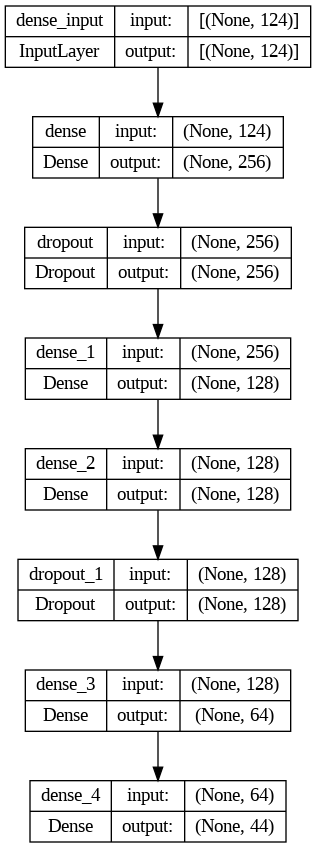

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.evaluate(train_x,train_y)

6/6 [==============================] - 1s 7ms/step - loss: 0.0039 - accuracy: 1.0000


[0.003887188620865345, 1.0]

In [ ]:
x_train=np.array(train_x)
val=np.expand_dims(x_train[0],axis=0)
val.shape

(1, 124)

In [ ]:
classes

['Cuts',
 'Abrasions',
 'stings',
 'Splinter',
 'Sprains',
 'Strains',
 'Fever',
 'Nasal Congestion',
 'Cough',
 'Sore Throat',
 'Gastrointestinal problems',
 'Skin problems',
 'Abdonominal Pain',
 'Bruises',
 'Broken Toe',
 'Choking',
 'Wound',
 'Diarrhea',
 'Frost bite',
 'Heat Exhaustion',
 'Heat Stroke',
 'Insect Bites',
 'nose bleed',
 'Pulled Muscle',
 'Rectal bleeding',
 'Sun Burn',
 'Testicle Pain',
 'Vertigo',
 'Normal Bleeding',
 'Eye Injury',
 'Chemical Burn',
 'Poison',
 'Teeth',
 'seizure',
 'Head Injury',
 'Fainting',
 'Headache',
 'Cold',
 'Rash',
 'snake bite',
 'animal bite',
 'Drowning',
 'CPR',
 'Fracture']

In [ ]:
pred = model.predict(val)
print(pred)
cl =np.argmax(pred,axis=1)

classes[cl[0]]

1/1 [==============================] - 0s 165ms/step
[[9.9851865e-01 5.9038830e-06 3.3555669e-05 1.2174692e-07 2.6031980e-06
  2.0344507e-07 1.5898337e-09 1.2255702e-05 3.4273472e-07 9.7650832e-07
  8.1687173e-09 4.3144102e-09 6.9439099e-09 6.5227674e-08 2.4771414e-09
  6.2186935e-08 7.3326225e-07 2.4534886e-06 4.7142967e-11 9.7365962e-08
  1.3528796e-07 4.9389486e-11 9.8456621e-07 1.9950448e-06 5.5392150e-07
  4.7196568e-08 1.1267890e-13 1.7886877e-10 2.6393751e-08 2.8525552e-08
  3.0121046e-07 3.8749533e-04 1.4614339e-07 2.2405768e-08 1.5615047e-05
  1.2762959e-07 7.7841811e-10 2.4742324e-09 2.8199513e-06 4.6003956e-10
  6.9412241e-12 9.7686751e-04 2.8232735e-05 6.6505613e-06]]


'Cuts'

In [ ]:
lemmatizer = WordNetLemmatizer()

# loading the files we made previously
intents = json.loads(open("/content/intents.json").read())
words = pickle.load(open('/content/words.pkl', 'rb'))
classes = pickle.load(open('/content/classes.pkl', 'rb'))
model = tf.keras.models.load_model('chatbotmodel.h5')

In [ ]:
for i in intents['intents']:
  print(i)

{'tag': 'Cuts', 'patterns': ['What to do if Cuts?', 'How to cure Cuts?', 'Which medicine to apply for Cuts?', 'what to apply on cuts?', 'Cuts'], 'responses': ['Wash the cut properly to prevent infection and stop the bleeding by applying pressure for 1-2minutes until bleeding stops. Apply Petroleum Jelly to make sure that the wound is moist for quick healing. Finally cover the cut with a sterile bandage. Pain relievers such as acetaminophen can be applied.'], 'context_set': ''}
{'tag': 'Abrasions', 'patterns': ['how do you treat abrasions?', 'Do Abrasions cause scars?', 'Abrasions', 'what to do if abrasions?', 'Which medicine to apply for abrasions?', 'How to cure abrasions?'], 'responses': ['Begin with washed hands.Gently clean the area with cool to lukewarm water and mild soap. Remove dirt or other particles from the wound using sterilized tweezers.For a mild scrape that’s not bleeding, leave the wound uncovered.If the wound is bleeding, use a clean cloth or bandage, and apply gentle 

In [ ]:
def clean_up_sentences(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower())
                      for word in sentence_words]
    return sentence_words

In [ ]:
def bagw(sentence):

	# separate out words from the input sentence
	sentence_words = clean_up_sentences(sentence)
	bag = [0]*len(words)
	for w in sentence_words:
		for i, word in enumerate(words):

			# check whether the word
			# is present in the input as well
			if word == w:

				# as the list of words
				# created earlier.
				bag[i] = 1

	# return a numpy array
	return np.array(bag)


In [ ]:
sentence = "What to do if Cuts?"
bag=bagw(sentence)
bag.shape

(124,)

In [ ]:
def predict_class(sentence,classes):
    bow = bagw(sentence)
    res = model.predict(np.array([bow]))
    cl =np.argmax(res,axis=1)
    p = classes[cl[0]]
    return p

In [ ]:
val = predict_class("What to do if Cuts?",classes)
val

1/1 [==============================] - 0s 35ms/step


'Cuts'

In [ ]:

def get_response(txt,classes,intents):
  p =predict_class(txt,classes)


  for i in intents['intents']:
    if p==i['tag']:
      respond =i['responses']
  return respond


print("Chatbot is up!")

Chatbot is up!


In [ ]:
while True:
    message = input("")
    res = get_response(message,classes,intents)
    print(res)